In [22]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from tensorflow.keras import layers

# source:
# https://www.tensorflow.org/tutorials/load_data/images

In [12]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file(origin=dataset_url, 
                                   fname='flower_photos', 
                                   untar=True)
data_dir = pathlib.Path(data_dir)

## Load images from subfolder within specified path

In [13]:
batch_size = 32
img_height = 180
img_width = 180

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [34]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [15]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


                                                  pf_dataset

In [25]:
#--- was able to load something to trial_1
my_dir = 'C:\\Users\dxoco\Desktop\IronHack\datamex_082020\pf_real_time_image_recognition'
trial_1 = tf.keras.preprocessing.image_dataset_from_directory(
  my_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 48 files belonging to 2 classes.
Using 39 files for training.


In [37]:
my_val = tf.keras.preprocessing.image_dataset_from_directory(
    my_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 48 files belonging to 2 classes.
Using 9 files for validation.


In [26]:
my_class_names = trial_1.class_names
print(my_class_names[1])

plate_numbers


## Visualize images

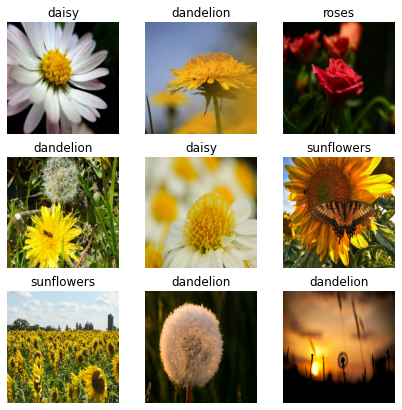

In [23]:
plt.figure(figsize=(7, 7))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

                                                  pf_dataset

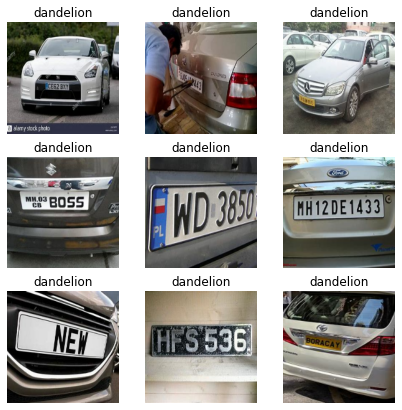

In [27]:
plt.figure(figsize=(7, 7))
for images, labels in trial_1.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [29]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 180, 180, 3)
(32,)


In [30]:
for image_batch, labels_batch in trial_1:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 180, 180, 3)
(32,)


## Standarize data

This is an important step to take. It can be done previous to the model or as a layer in the model.

It will be done as a layer within the model.

## Configure dataset for efficiency

In [35]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [38]:
TUNA_2 = tf.data.experimental.AUTOTUNE

trial_1 = trial_1.cache().prefetch(buffer_size=TUNA_2)
my_val = my_val.cache().prefetch(buffer_size=TUNA_2)

## Train a model

In [39]:
num_classes = 5

model = tf.keras.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [40]:
model.compile(optimizer='adam',loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [41]:
model.fit(train_ds,validation_data=val_ds,epochs=3)

Epoch 1/3
92/92 [==============================] - 45s 491ms/step - loss: 1.2669 - accuracy: 0.4595 - val_loss: 1.1547 - val_accuracy: 0.5136
Epoch 2/3
92/92 [==============================] - 41s 442ms/step - loss: 1.0031 - accuracy: 0.6097 - val_loss: 0.9392 - val_accuracy: 0.6322
Epoch 3/3
92/92 [==============================] - 40s 430ms/step - loss: 0.8524 - accuracy: 0.6757 - val_loss: 1.0180 - val_accuracy: 0.6131


                                                  pf_dataset